# Producing predictions on a rectangular domain

Here we will demonstrate applying a trained network to produce embeddnig vectors for an input dataset containing a scene with data on a uniform Cartesian grid. The example below has been projected and resampled to have $\Delta x = \Delta y = 1km$ resolution.

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

from convml_tt.interpretation.rectpred.transform import apply_transform
from convml_tt.data.examples import load_pretrained_model, PretrainedModel
from convml_tt.interpretation.rectpred.data import make_sliding_tile_model_predictions

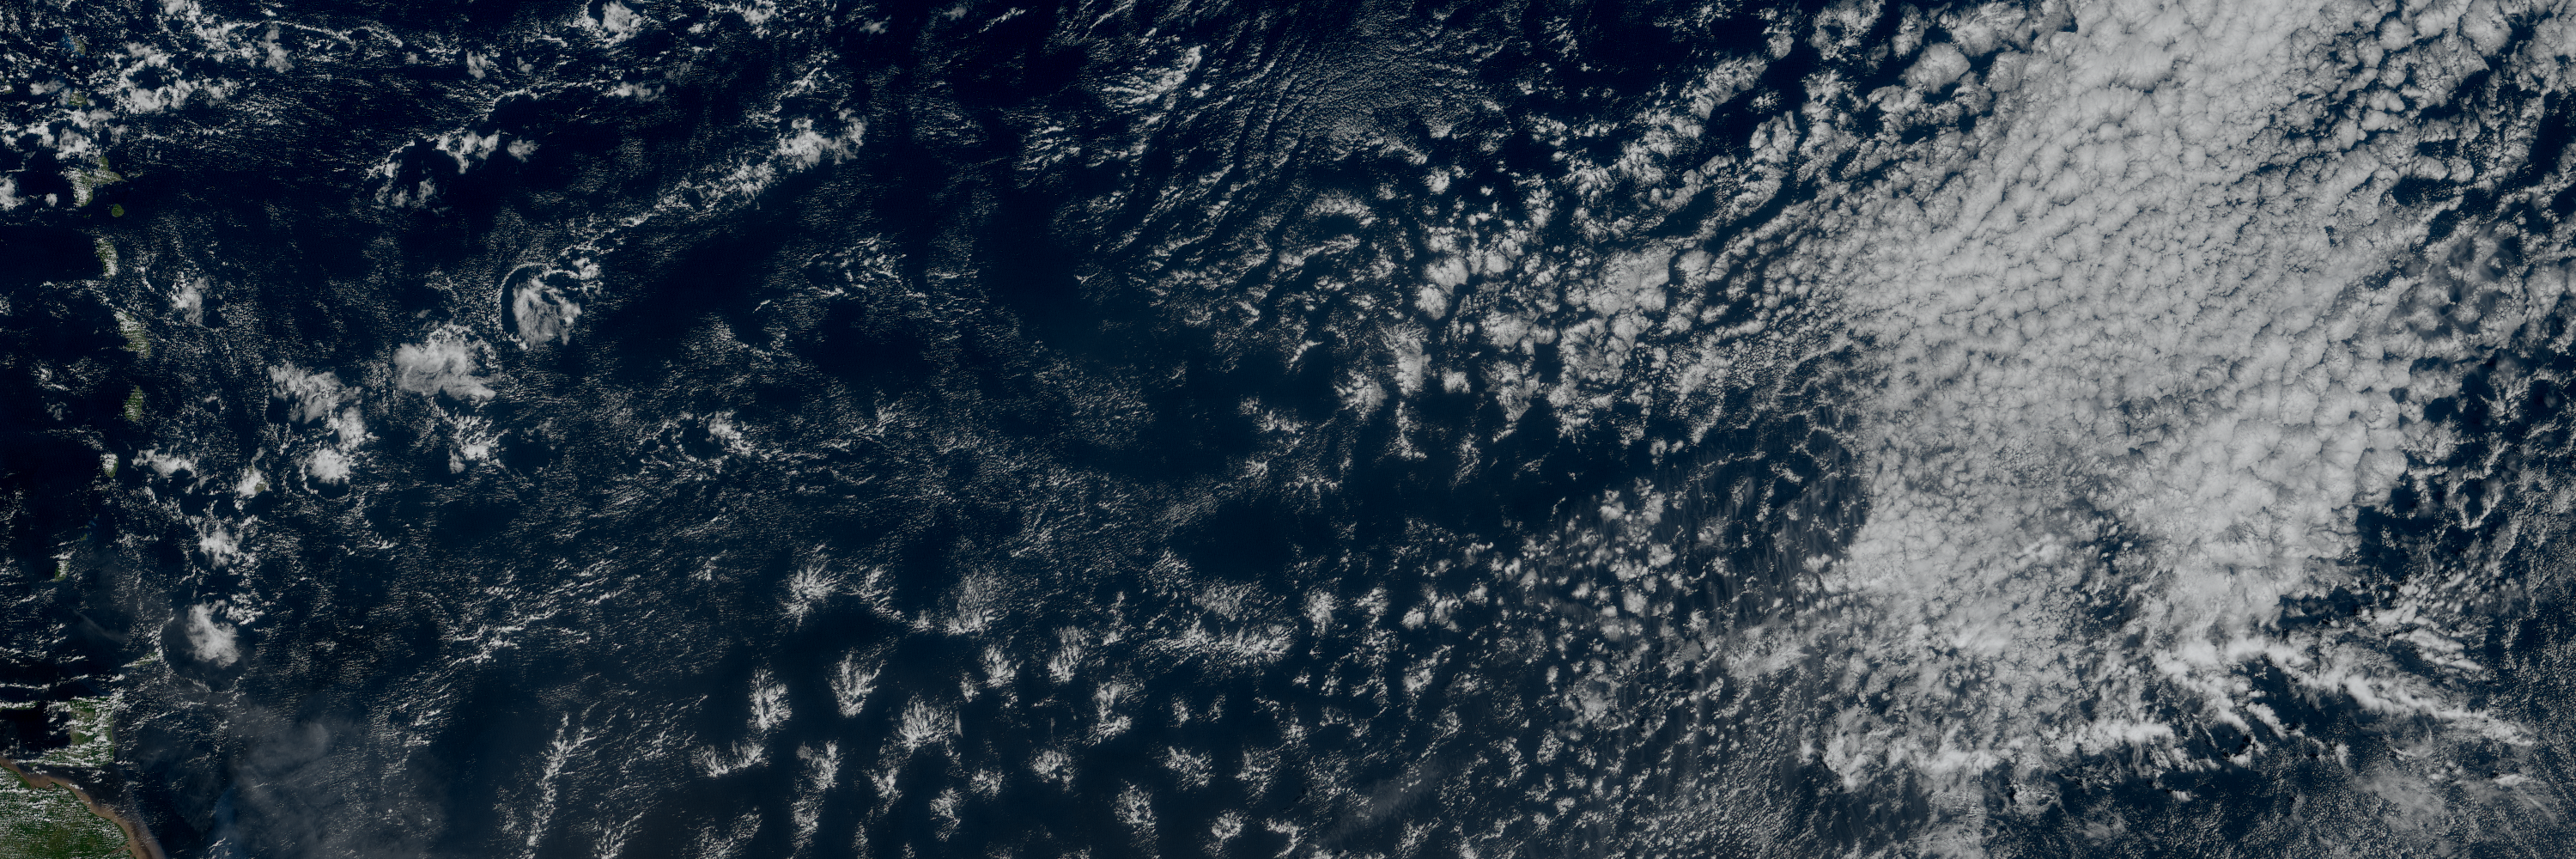

In [2]:
img = Image.open("../../doc/goes16_202002051400.png")
img

First, we need a model create the embeddings with. For now we will use the network that was used in L. Denby 2020

In [ ]:
model = load_pretrained_model(PretrainedModel.FIXED_NORM_STAGE2)

We next use this model to produce embeddings in a sliding-window fashion by applying the neural network to tiles created from the large image with steps in the x- and y-direction

In [ ]:
da_emb = make_sliding_tile_model_predictions(img=img, model=model, step=(200, 200))

To get an idea of the embedding vectors we've produced we can plot the first component of the embedding vectors at each point an overlay on the original image

In [ ]:
r_aspect = img.size[0] / img.size[1] * 1.4
fig, ax = plt.subplots(figsize=(4.0 * r_aspect, 4.0))
ax.imshow(img)
da_emb.isel(emb_dim=0).plot(ax=ax, y="j0", alpha=0.3, robust=True)

This looks a bit blotchy when we're only looking at one dimension of the embedding space. That is because more than one embedding space dimension has been used by the network to separate the cloud types.

Let's next use PCA analysis to reduce the embedding space into a set of orthogonal dimensions that best map the embeddnig space, and then plot the first PCA component

In [ ]:
da_emb_pca = apply_transform(da_emb, "pca")

r_aspect = img.size[0] / img.size[1] * 1.4
fig, ax = plt.subplots(figsize=(4.0 * r_aspect, 4.0))
ax.imshow(img)
da_emb_pca.isel(pca_dim=0).plot(ax=ax, y="j0", alpha=0.3, robust=True)

In [ ]:
# looking at the second PCA component

r_aspect = img.size[0] / img.size[1] * 1.4
fig, ax = plt.subplots(figsize=(4.0 * r_aspect, 4.0))
ax.imshow(img)
da_emb_pca.isel(pca_dim=1).plot(ax=ax, y="j0", alpha=0.3, robust=True)

These first PCA components collectively capture ~71% of the total variability, and we can se that they capture different aspects of the organisation by how the extreme values are concentrated in different regions for both.

In [ ]:
da_emb